In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
economy_df = pd.read_csv("VCT_2024_seoul_dataset/economy_data.csv")
economy_df

,map,Team,Pistol Won,Eco (won),Semi-eco (won),Semi-buy (won),Full buy(won),match_id
0,Haven,GEN,2,2 (2),1 (0),6 (4),12 (7),378662
1,Haven,SEN,0,4 (0),1 (0),5 (2),11 (6),378662
2,Ascent,GEN,1,3 (1),0 (0),3 (3),14 (9),378662
3,Ascent,SEN,1,3 (1),2 (0),5 (1),10 (5),378662
4,All Maps,GEN,3,5 (3),1 (0),9 (7),26 (16),378662
...,...,...,...,...,...,...,...,...
211,Lotus,TH,1,3 (2),2 (0),7 (4),10 (3),378829
212,Bind,EDG,0,4 (0),1 (0),5 (4),14 (7),378829
213,Bind,TH,2,2 (2),1 (1),7 (4),14 (6),378829
214,All Maps,EDG,2,2 (2),0 (0),8 (5),12 (6),378829


## Data Cleaning

In [3]:
# Cleaning Eco (won) column
economy_df[['Eco', 'Eco-won']] = economy_df['Eco (won)'].str.extract(r'(\d+)\s*\((\d+)\)')
economy_df[['Eco', 'Eco-won']] = economy_df[['Eco', 'Eco-won']].astype(int)

# clean Semi-eco (won) column
economy_df [['Semi-eco', 'Semi-eco-won']] = economy_df['Semi-eco (won)'].str.extract(r'(\d+)\s*\((\d+)\)')
economy_df [['Semi-eco', 'Semi-eco-won']] = economy_df [['Semi-eco', 'Semi-eco-won']].astype(int)

# clean Semi-buy (won)
economy_df[['Semi-buy','Semi-buy-won']] = economy_df['Semi-buy (won)'].str.extract(r'(\d+)\s*\((\d+)\)')
economy_df[['Semi-buy','Semi-buy-won']] = economy_df[['Semi-buy','Semi-buy-won']].astype(int)

# clean Full buy(won)
economy_df[['Full-buy','Full-buy-won']] = economy_df['Full buy(won)'].str.extract(r'(\d+)\s*\((\d+)\)')
economy_df[['Full-buy','Full-buy-won']] = economy_df[['Full-buy','Full-buy-won']].astype(int)
economy_df

,map,Team,Pistol Won,Eco (won),Semi-eco (won),Semi-buy (won),Full buy(won),match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won
0,Haven,GEN,2,2 (2),1 (0),6 (4),12 (7),378662,2,2,1,0,6,4,12,7
1,Haven,SEN,0,4 (0),1 (0),5 (2),11 (6),378662,4,0,1,0,5,2,11,6
2,Ascent,GEN,1,3 (1),0 (0),3 (3),14 (9),378662,3,1,0,0,3,3,14,9
3,Ascent,SEN,1,3 (1),2 (0),5 (1),10 (5),378662,3,1,2,0,5,1,10,5
4,All Maps,GEN,3,5 (3),1 (0),9 (7),26 (16),378662,5,3,1,0,9,7,26,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Lotus,TH,1,3 (2),2 (0),7 (4),10 (3),378829,3,2,2,0,7,4,10,3
212,Bind,EDG,0,4 (0),1 (0),5 (4),14 (7),378829,4,0,1,0,5,4,14,7
213,Bind,TH,2,2 (2),1 (1),7 (4),14 (6),378829,2,2,1,1,7,4,14,6
214,All Maps,EDG,2,2 (2),0 (0),8 (5),12 (6),378829,2,2,0,0,8,5,12,6


In [4]:
# drop columns
economy_df.drop(['Eco (won)', 'Semi-eco (won)','Semi-buy (won)', 'Full buy(won)'], axis = 1, inplace = True)

In [5]:
economy_df['map'].unique()

array(['Haven', 'Ascent', 'All Maps', 'Abyss', 'Bind', 'Lotus', 'Sunset',
       'Icebox', 'ascent', 'kekw', 'rate', 'lotus', 'first'], dtype=object)

In [6]:
economy_df['Team'].unique()

array(['GEN', 'SEN', 'FPX', 'TH', 'DRX', 'KRÜ', 'FNC', 'BLG', 'LEV',
       'TLN', 'VIT', 'TE', 'G2', 'PRX', 'EDG', 'FUT'], dtype=object)

In [7]:
# Remove unnecessary rows and fix the map names
remove_rows = ['All Maps', 'first','kekw','rate']
economy_df = economy_df.query("map not in @remove_rows").copy()
economy_df['map'] = economy_df['map'].str.strip().str.title()
economy_df

,map,Team,Pistol Won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won
0,Haven,GEN,2,378662,2,2,1,0,6,4,12,7
1,Haven,SEN,0,378662,4,0,1,0,5,2,11,6
2,Ascent,GEN,1,378662,3,1,0,0,3,3,14,9
3,Ascent,SEN,1,378662,3,1,2,0,5,1,10,5
6,Abyss,FPX,0,378663,4,0,3,1,4,2,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sunset,TH,0,378829,3,0,2,0,5,3,7,1
210,Lotus,EDG,1,378829,4,2,0,0,4,2,14,9
211,Lotus,TH,1,378829,3,2,2,0,7,4,10,3
212,Bind,EDG,0,378829,4,0,1,0,5,4,14,7


#### Fix the Eco & Eco-won column
In the data the collected for the eco round, since the eco rounds and the pistol rounds both have buyout of 0-5K, the data counts the pistol round won as eco rounds won. lets seperate the pistol rounds from eco rounds 

In [8]:
# Add a column for pistol rounds played
economy_df.loc[:,'Pistol'] = 2
economy_df.loc[:,'Eco'] = economy_df['Eco'] - economy_df['Pistol']
economy_df.loc[:,'Eco-won'] = economy_df['Eco-won'] - economy_df['Pistol Won']
economy_df

,map,Team,Pistol Won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won,Pistol
0,Haven,GEN,2,378662,0,0,1,0,6,4,12,7,2
1,Haven,SEN,0,378662,2,0,1,0,5,2,11,6,2
2,Ascent,GEN,1,378662,1,0,0,0,3,3,14,9,2
3,Ascent,SEN,1,378662,1,0,2,0,5,1,10,5,2
6,Abyss,FPX,0,378663,2,0,3,1,4,2,15,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sunset,TH,0,378829,1,0,2,0,5,3,7,1,2
210,Lotus,EDG,1,378829,2,1,0,0,4,2,14,9,2
211,Lotus,TH,1,378829,1,1,2,0,7,4,10,3,2
212,Bind,EDG,0,378829,2,0,1,0,5,4,14,7,2


In [9]:
economy_df = economy_df.rename(columns= {'Pistol Won' : 'Pistol-won'})

In [10]:
econ_type = ['Pistol', 'Eco', 'Semi-eco', 'Semi-buy', 'Full-buy']

for econ in econ_type:
    played_col = econ
    won_col = (f"{econ}-won")
    winrate_col = (f"{econ}-winrate")
    # if rounds are played then calulate winrate else add NaN
    economy_df[winrate_col] = np.where( economy_df[played_col] >0, (economy_df[won_col]/ economy_df[played_col]).round(2), np.nan)

economy_df

,map,Team,Pistol-won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won,Pistol,Pistol-winrate,Eco-winrate,Semi-eco-winrate,Semi-buy-winrate,Full-buy-winrate
0,Haven,GEN,2,378662,0,0,1,0,6,4,12,7,2,1.0,NaN,0.00,0.67,0.58
1,Haven,SEN,0,378662,2,0,1,0,5,2,11,6,2,0.0,0.0,0.00,0.40,0.55
2,Ascent,GEN,1,378662,1,0,0,0,3,3,14,9,2,0.5,0.0,NaN,1.00,0.64
3,Ascent,SEN,1,378662,1,0,2,0,5,1,10,5,2,0.5,0.0,0.00,0.20,0.50
6,Abyss,FPX,0,378663,2,0,3,1,4,2,15,9,2,0.0,0.0,0.33,0.50,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Sunset,TH,0,378829,1,0,2,0,5,3,7,1,2,0.0,0.0,0.00,0.60,0.14
210,Lotus,EDG,1,378829,2,1,0,0,4,2,14,9,2,0.5,0.5,NaN,0.50,0.64
211,Lotus,TH,1,378829,1,1,2,0,7,4,10,3,2,0.5,1.0,0.00,0.57,0.30
212,Bind,EDG,0,378829,2,0,1,0,5,4,14,7,2,0.0,0.0,0.00,0.80,0.50


In [11]:
detailed_matches_df = pd.read_csv('VCT_2024_seoul_dataset/detailed_matches_maps.csv')
detailed_matches_df

,match_id,map_name,map_order,score,winner,duration,picked_by
0,378662,Haven,1,13 - 8,Gen.G,1:02:40,Sentinels
1,378662,Ascent,2,13 - 7,Gen.G,46:45,Gen.G
2,378663,Abyss,1,12 - 14,Team Heretics,1:10:12,FunPlus Phoenix
3,378663,Bind,2,13 - 9,FunPlus Phoenix,53:01,Team Heretics
4,378663,Lotus,3,13 - 15,Team Heretics,1:07:12,Decider
...,...,...,...,...,...,...,...
81,378829,Haven,1,6 - 13,Team Heretics,1:16:43,EDward Gaming
82,378829,Sunset,2,13 - 4,EDward Gaming,45:11,Team Heretics
83,378829,Lotus,3,13 - 9,EDward Gaming,55:30,EDward Gaming
84,378829,Bind,4,11 - 13,Team Heretics,1:01:45,Team Heretics


In [12]:
econ_df = pd.merge(economy_df, detailed_matches_df[['match_id','winner', 'map_name']], left_on= ['match_id', 'map'], right_on= ['match_id', 'map_name'], how = 'left')
econ_df

,map,Team,Pistol-won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won,Pistol,Pistol-winrate,Eco-winrate,Semi-eco-winrate,Semi-buy-winrate,Full-buy-winrate,winner,map_name
0,Haven,GEN,2,378662,0,0,1,0,6,4,12,7,2,1.0,NaN,0.00,0.67,0.58,Gen.G,Haven
1,Haven,SEN,0,378662,2,0,1,0,5,2,11,6,2,0.0,0.0,0.00,0.40,0.55,Gen.G,Haven
2,Ascent,GEN,1,378662,1,0,0,0,3,3,14,9,2,0.5,0.0,NaN,1.00,0.64,Gen.G,Ascent
3,Ascent,SEN,1,378662,1,0,2,0,5,1,10,5,2,0.5,0.0,0.00,0.20,0.50,Gen.G,Ascent
4,Abyss,FPX,0,378663,2,0,3,1,4,2,15,9,2,0.0,0.0,0.33,0.50,0.60,Team Heretics,Abyss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sunset,TH,0,378829,1,0,2,0,5,3,7,1,2,0.0,0.0,0.00,0.60,0.14,EDward Gaming,Sunset
154,Lotus,EDG,1,378829,2,1,0,0,4,2,14,9,2,0.5,0.5,NaN,0.50,0.64,EDward Gaming,Lotus
155,Lotus,TH,1,378829,1,1,2,0,7,4,10,3,2,0.5,1.0,0.00,0.57,0.30,EDward Gaming,Lotus
156,Bind,EDG,0,378829,2,0,1,0,5,4,14,7,2,0.0,0.0,0.00,0.80,0.50,Team Heretics,Bind


In [13]:
team_name_map = {
    'GEN': 'Gen.G',
    'SEN': 'Sentinels',
    'FPX': 'FunPlus Phoenix',
    'TH': 'Team Heretics',
    'DRX': 'DRX',
    'KRÜ': 'KRÜ Esports',
    'FNC': 'FNATIC',
    'BLG': 'Bilibili Gaming',
    'LEV': 'LEVIATÁN',
    'TLN': 'TALON',
    'VIT': 'Team Vitality',
    'TE': 'Trace Esports',
    'G2': 'G2 Esports',
    'PRX': 'Paper Rex',
    'EDG': 'EDward Gaming',
    'FUT': 'FUT Esports'
}

### ECON DataFrame Cleanup
- Map team names using `team_name_map` for consistency  
- Drop `map_name` column (not needed for econ analysis)  
- Create `win_status` flag → 1 if team won, else 0

In [14]:
econ_df['Team'] = econ_df['Team'].map(team_name_map)
econ_df.drop(columns = {'map_name'}, axis = 1, inplace = True)
econ_df['win_status'] = (econ_df['Team'] == econ_df['winner']).astype(int)
econ_df

,map,Team,Pistol-won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won,Pistol,Pistol-winrate,Eco-winrate,Semi-eco-winrate,Semi-buy-winrate,Full-buy-winrate,winner,win_status
0,Haven,Gen.G,2,378662,0,0,1,0,6,4,12,7,2,1.0,NaN,0.00,0.67,0.58,Gen.G,1
1,Haven,Sentinels,0,378662,2,0,1,0,5,2,11,6,2,0.0,0.0,0.00,0.40,0.55,Gen.G,0
2,Ascent,Gen.G,1,378662,1,0,0,0,3,3,14,9,2,0.5,0.0,NaN,1.00,0.64,Gen.G,1
3,Ascent,Sentinels,1,378662,1,0,2,0,5,1,10,5,2,0.5,0.0,0.00,0.20,0.50,Gen.G,0
4,Abyss,FunPlus Phoenix,0,378663,2,0,3,1,4,2,15,9,2,0.0,0.0,0.33,0.50,0.60,Team Heretics,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sunset,Team Heretics,0,378829,1,0,2,0,5,3,7,1,2,0.0,0.0,0.00,0.60,0.14,EDward Gaming,0
154,Lotus,EDward Gaming,1,378829,2,1,0,0,4,2,14,9,2,0.5,0.5,NaN,0.50,0.64,EDward Gaming,1
155,Lotus,Team Heretics,1,378829,1,1,2,0,7,4,10,3,2,0.5,1.0,0.00,0.57,0.30,EDward Gaming,0
156,Bind,EDward Gaming,0,378829,2,0,1,0,5,4,14,7,2,0.0,0.0,0.00,0.80,0.50,Team Heretics,0


In [15]:
econ_df = econ_df[econ_df['Pistol-won'] <=2].copy()
econ_df = econ_df.dropna(subset= ['winner'])

In [16]:
econ_df

,map,Team,Pistol-won,match_id,Eco,Eco-won,Semi-eco,Semi-eco-won,Semi-buy,Semi-buy-won,Full-buy,Full-buy-won,Pistol,Pistol-winrate,Eco-winrate,Semi-eco-winrate,Semi-buy-winrate,Full-buy-winrate,winner,win_status
0,Haven,Gen.G,2,378662,0,0,1,0,6,4,12,7,2,1.0,NaN,0.00,0.67,0.58,Gen.G,1
1,Haven,Sentinels,0,378662,2,0,1,0,5,2,11,6,2,0.0,0.0,0.00,0.40,0.55,Gen.G,0
2,Ascent,Gen.G,1,378662,1,0,0,0,3,3,14,9,2,0.5,0.0,NaN,1.00,0.64,Gen.G,1
3,Ascent,Sentinels,1,378662,1,0,2,0,5,1,10,5,2,0.5,0.0,0.00,0.20,0.50,Gen.G,0
4,Abyss,FunPlus Phoenix,0,378663,2,0,3,1,4,2,15,9,2,0.0,0.0,0.33,0.50,0.60,Team Heretics,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sunset,Team Heretics,0,378829,1,0,2,0,5,3,7,1,2,0.0,0.0,0.00,0.60,0.14,EDward Gaming,0
154,Lotus,EDward Gaming,1,378829,2,1,0,0,4,2,14,9,2,0.5,0.5,NaN,0.50,0.64,EDward Gaming,1
155,Lotus,Team Heretics,1,378829,1,1,2,0,7,4,10,3,2,0.5,1.0,0.00,0.57,0.30,EDward Gaming,0
156,Bind,EDward Gaming,0,378829,2,0,1,0,5,4,14,7,2,0.0,0.0,0.00,0.80,0.50,Team Heretics,0


In [17]:
econ_df.columns

Index(['map', 'Team', 'Pistol-won', 'match_id', 'Eco', 'Eco-won', 'Semi-eco',
       'Semi-eco-won', 'Semi-buy', 'Semi-buy-won', 'Full-buy', 'Full-buy-won',
       'Pistol', 'Pistol-winrate', 'Eco-winrate', 'Semi-eco-winrate',
       'Semi-buy-winrate', 'Full-buy-winrate', 'winner', 'win_status'],
      dtype='object')

In [18]:
# restructure the df
new_order = ['match_id', 'map', 'Team','winner','win_status', 'Pistol', 'Pistol-won', 'Pistol-winrate','Eco', 'Eco-won','Eco-winrate',
             'Semi-eco', 'Semi-eco-won','Semi-eco-winrate', 'Semi-buy', 'Semi-buy-won', 'Semi-buy-winrate','Full-buy','Full-buy-won',  'Full-buy-winrate']
econ_df = econ_df[new_order]
econ_df

,match_id,map,Team,winner,win_status,Pistol,Pistol-won,Pistol-winrate,Eco,Eco-won,Eco-winrate,Semi-eco,Semi-eco-won,Semi-eco-winrate,Semi-buy,Semi-buy-won,Semi-buy-winrate,Full-buy,Full-buy-won,Full-buy-winrate
0,378662,Haven,Gen.G,Gen.G,1,2,2,1.0,0,0,NaN,1,0,0.00,6,4,0.67,12,7,0.58
1,378662,Haven,Sentinels,Gen.G,0,2,0,0.0,2,0,0.0,1,0,0.00,5,2,0.40,11,6,0.55
2,378662,Ascent,Gen.G,Gen.G,1,2,1,0.5,1,0,0.0,0,0,NaN,3,3,1.00,14,9,0.64
3,378662,Ascent,Sentinels,Gen.G,0,2,1,0.5,1,0,0.0,2,0,0.00,5,1,0.20,10,5,0.50
4,378663,Abyss,FunPlus Phoenix,Team Heretics,0,2,0,0.0,2,0,0.0,3,1,0.33,4,2,0.50,15,9,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,378829,Sunset,Team Heretics,EDward Gaming,0,2,0,0.0,1,0,0.0,2,0,0.00,5,3,0.60,7,1,0.14
154,378829,Lotus,EDward Gaming,EDward Gaming,1,2,1,0.5,2,1,0.5,0,0,NaN,4,2,0.50,14,9,0.64
155,378829,Lotus,Team Heretics,EDward Gaming,0,2,1,0.5,1,1,1.0,2,0,0.00,7,4,0.57,10,3,0.30
156,378829,Bind,EDward Gaming,Team Heretics,0,2,0,0.0,2,0,0.0,1,0,0.00,5,4,0.80,14,7,0.50


## Analysis and Visualization

### Overall Round Distribution
- Sum round types (Pistol, Eco, Semi‑eco, Semi‑buy, Full‑buy) across all matches  
- Sort totals for consistent ordering  
- Plot pie chart showing percentage share of each economy type

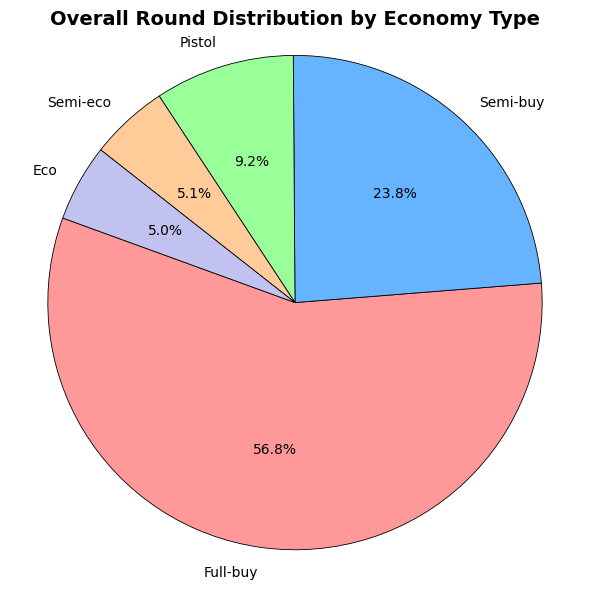

In [19]:
# overall round distribution

round_cols = ['Pistol','Eco','Semi-eco',  'Semi-buy', 'Full-buy']
round_sum = econ_df[round_cols].sum().sort_values(ascending = False)
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
# visualization
plt.figure(figsize = (6,6))
plt.pie(round_sum, 
        labels = round_sum.index,
        autopct = "%1.1f%%",
        colors = colors, 
        startangle= 160,
        wedgeprops = {'edgecolor' : 'black', 'linewidth':0.6})

plt.title('Overall Round Distribution by Economy Type', fontsize = 14, fontweight = 'semibold')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Overall Winrate for Each Economy Type
- Compute average winrate (%) across all maps for each economy type  
- Plot bar chart showing distribution (Pistol, Eco, Semi‑eco, Semi‑buy, Full‑buy)


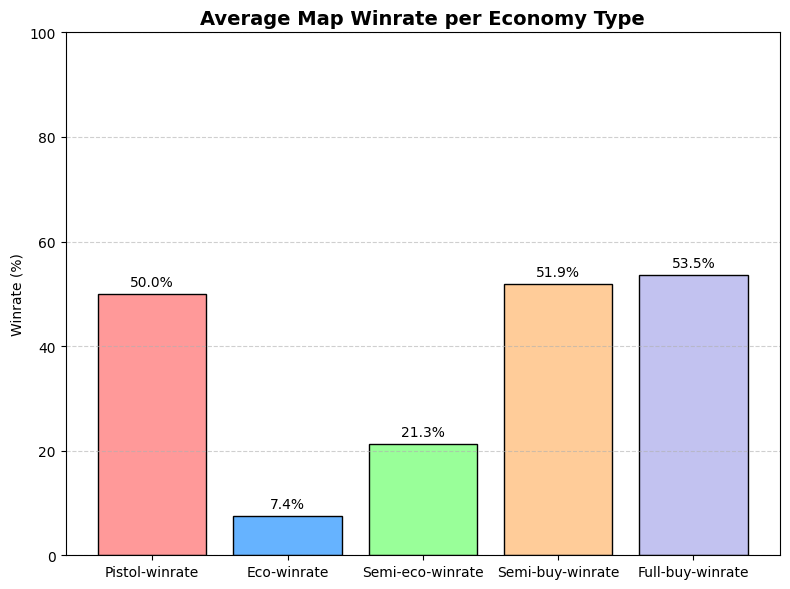

In [20]:
# overall winrate for each economy type

winrate_cols = ['Pistol-winrate', 'Eco-winrate', 'Semi-eco-winrate','Semi-buy-winrate', 'Full-buy-winrate']

overall_avg_winrates = (econ_df[winrate_cols].mean() * 100)

# visualization
plt.figure(figsize = (8,6))
bars = plt.bar(overall_avg_winrates.index, overall_avg_winrates.values, color = colors, edgecolor = 'black')
plt.title("Average Map Winrate per Economy Type", fontsize = 14, fontweight = 'semibold')
plt.ylabel('Winrate (%)')
plt.ylim(0,100)

# adding bar percentage label on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, F'{yval:.1f}%', ha = 'center', va = 'bottom')


plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

### Average Economy Rounds Played per Map
- Compute average counts of each round type per map  
- Normalize values row‑wise to percentages  
- Sort maps by Full‑buy share  
- Plot stacked percentage bar chart with labels inside segments

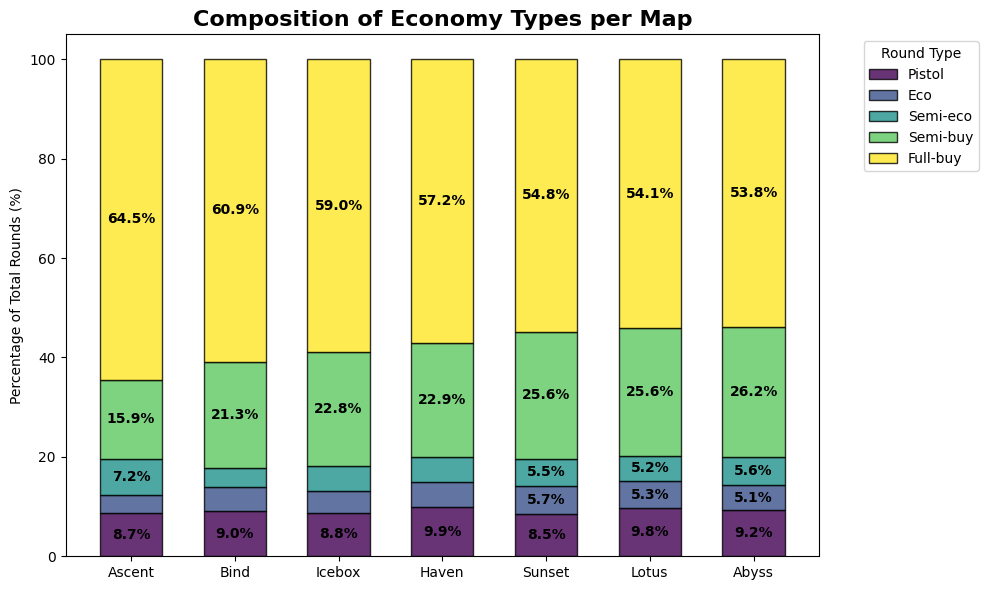

In [21]:
# average economy rounds played each map
# 1. Calculate average counts
economy_cols = ['Pistol', 'Eco', 'Semi-eco', 'Semi-buy', 'Full-buy']
map_avg_rounds = econ_df.groupby('map')[economy_cols].mean()

# 2. Normalize to 100% (row-wise)
map_eco_pct = map_avg_rounds.div(map_avg_rounds.sum(axis=1), axis=0) * 100
map_eco_pct = map_eco_pct.sort_values('Full-buy', ascending=False)

# 3. Plotting the Stacked Percentage Bar Chart
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(economy_cols)), alpha=0.6)

bottom = np.zeros(len(map_eco_pct))
for i, col in enumerate(economy_cols):
    bars = plt.bar(map_eco_pct.index, map_eco_pct[col], bottom=bottom, 
                   color=colors[i], label=col, edgecolor='black', width = 0.6, alpha = 0.8)
    
    # Label percentages inside bars (if large enough)
    for bar in bars:
        height = bar.get_height()
        if height > 5:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, 
                     f'{height:.1f}%', ha='center', va='center', 
                     color='black', fontweight='semibold')
    bottom += map_eco_pct[col]

plt.title('Composition of Economy Types per Map', fontsize=16, fontweight='semibold')
plt.ylabel('Percentage of Total Rounds (%)')
plt.legend(title="Round Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Relation Between Winning Pistol Rounds and Match Win Probability
- Group data by pistol rounds won and compute average map win probability  
- Plot bar chart showing impact of pistol round success on overall winrate

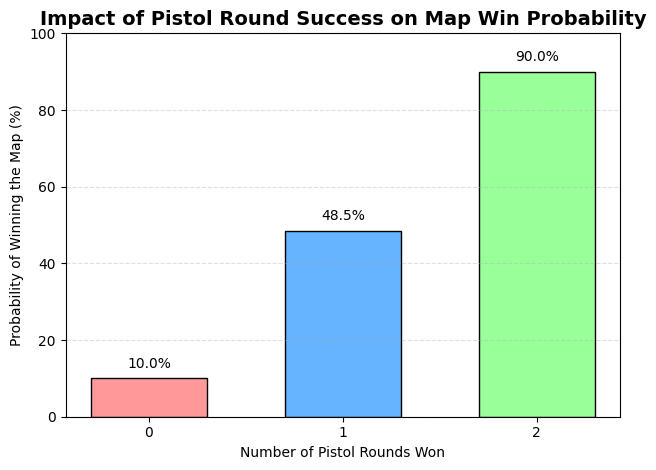

In [ ]:
# relation between winning pistol and winning match

# filter pistol rounds

win_prob = econ_df.groupby('Pistol-won')['win_status'].mean() * 100

# create visualization
colors = ['#ff9999','#66b3ff','#99ff99']
bars = plt.bar(win_prob.index.astype(int).astype(str), win_prob.values,
                color = colors, edgecolor = 'black', width = 0.6)

# formatting
plt.title('Impact of Pistol Round Success on Map Win Probability', fontsize = 14, fontweight = 'semibold')
plt.xlabel('Number of Pistol Rounds Won')
plt.ylabel('Probability of Winning the Map (%)')
plt.ylim(0,100)
plt.grid(axis  = 'y', linestyle = '--', alpha = 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{height:.1f}%", ha = 'center', va = 'bottom' )

plt.tight_layout()
plt.show()

### Relation Between Winning Eco/Semi‑Eco Rounds and Match Win Probability
- Define helper function to compute win probability based on round outcomes  
- Calculate probabilities for eco, semi‑eco, and semi‑buy rounds  
- Prepare grouped data for comparison (lost all vs. won ≥1)  
- Plot grouped bar chart showing impact of round success on match win probability

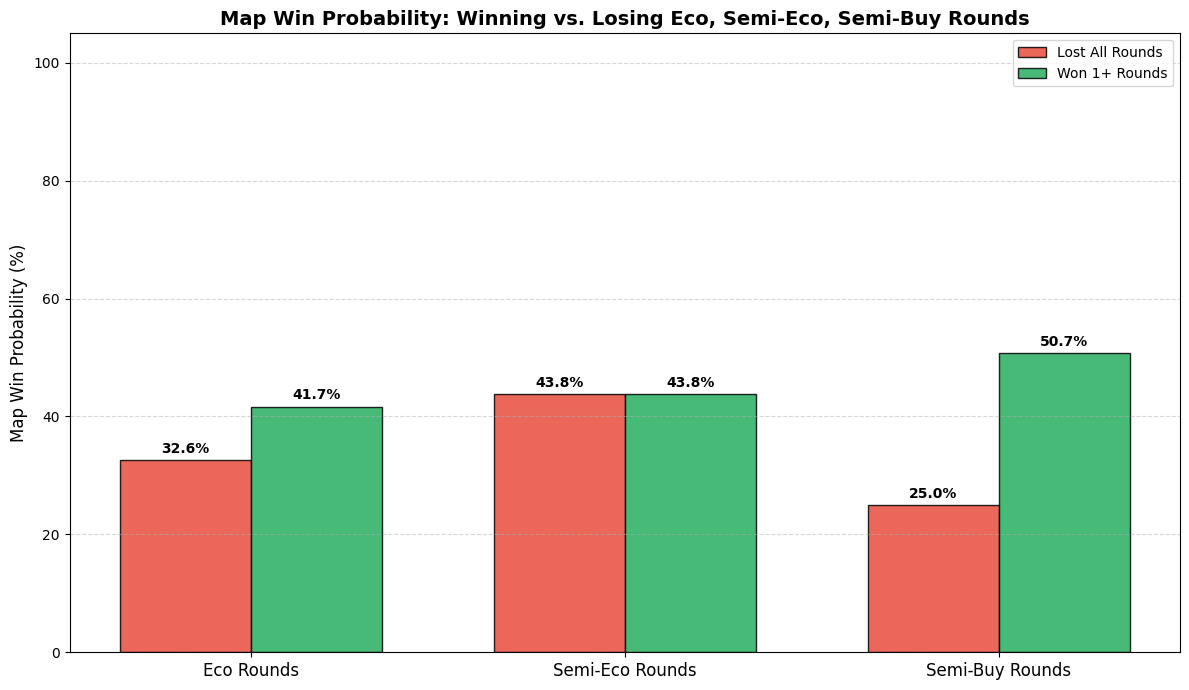

In [23]:
# relation between winning eco, semi eco and winning the match

# Calculate Probabilities for each economy type
def get_stats(df, round_col, won_col):
    data = df[df[round_col] > 0].copy()
    data['won_any'] = data[won_col] > 0
    return data.groupby('won_any')['win_status'].mean() * 100

eco_probs = get_stats(econ_df, 'Eco', 'Eco-won')
semi_eco_probs = get_stats(econ_df, 'Semi-eco', 'Semi-eco-won')
semi_buy_probs = get_stats(econ_df, 'Semi-buy', 'Semi-buy-won')

# Data Preparation
labels = ['Eco Rounds', 'Semi-Eco Rounds', 'Semi-Buy Rounds']
lose_all = [eco_probs.get(False, 0), semi_eco_probs.get(False, 0), semi_buy_probs.get(False, 0)]
win_one_plus = [eco_probs.get(True, 0), semi_eco_probs.get(True, 0), semi_buy_probs.get(True, 0)]

x = np.arange(len(labels))
width = 0.35

# Plotting
plt.figure(figsize=(12, 7))
rects1 = plt.bar(x - width/2, lose_all, width, label='Lost All Rounds', color='#E74C3C', edgecolor='black', alpha=0.85)
rects2 = plt.bar(x + width/2, win_one_plus, width, label='Won 1+ Rounds', color='#27AE60', edgecolor='black', alpha=0.85)

# Formatting
plt.ylabel('Map Win Probability (%)', fontsize=12)
plt.title('Map Win Probability: Winning vs. Losing Eco, Semi-Eco, Semi-Buy Rounds', fontsize=14, fontweight='semibold')
plt.xticks(x, labels, fontsize=12)
plt.legend()
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontweight='semibold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


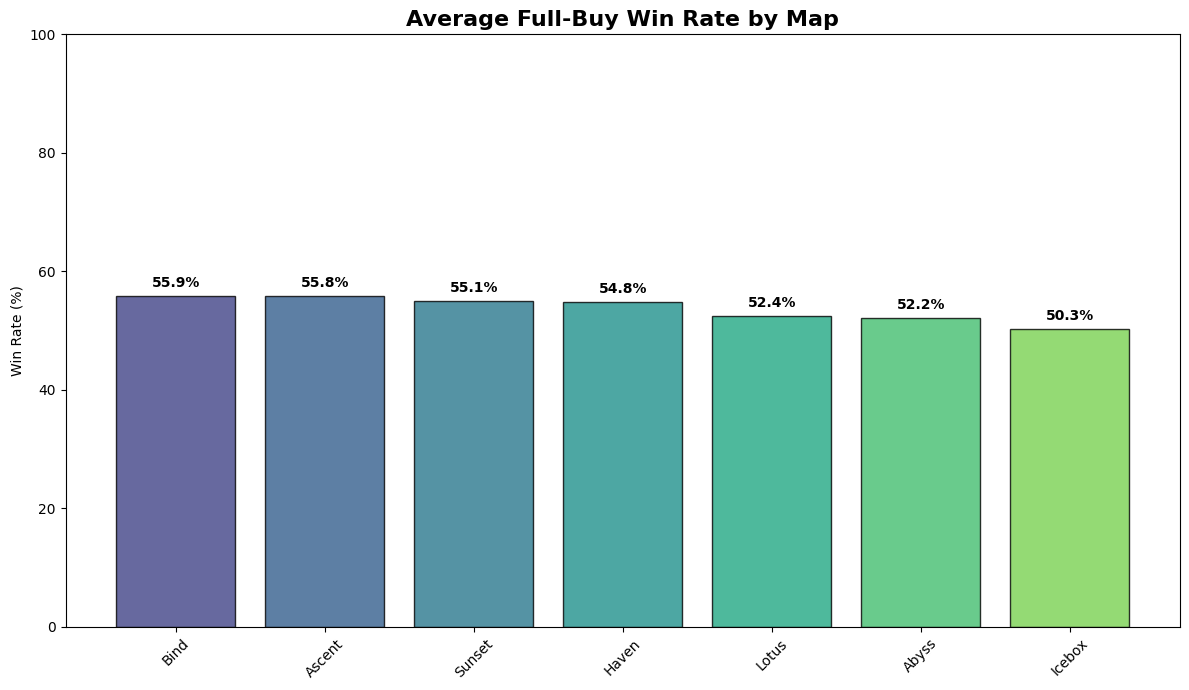

In [24]:
# average full buy win rate by map
# Group by map and calculate average Full-buy-winrate
# filter out maps where no Full-buys occurred to avoid errors
map_fb_stats = econ_df[econ_df['Full-buy'] > 0].groupby('map')['Full-buy-winrate'].mean() * 100
map_fb_stats = map_fb_stats.sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(map_fb_stats)))
bars = plt.bar(map_fb_stats.index, map_fb_stats.values, color=colors, edgecolor='black', alpha=0.8)

plt.title('Average Full-Buy Win Rate by Map', fontsize=16, fontweight='semibold')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontweight='semibold')

plt.tight_layout()
plt.show()


### Average Full‑Buy Win Rate by Map
- Filter maps with at least one full‑buy round  
- Group by map and compute average full‑buy winrate (%)  
- Sort maps in descending order and plot bar chart

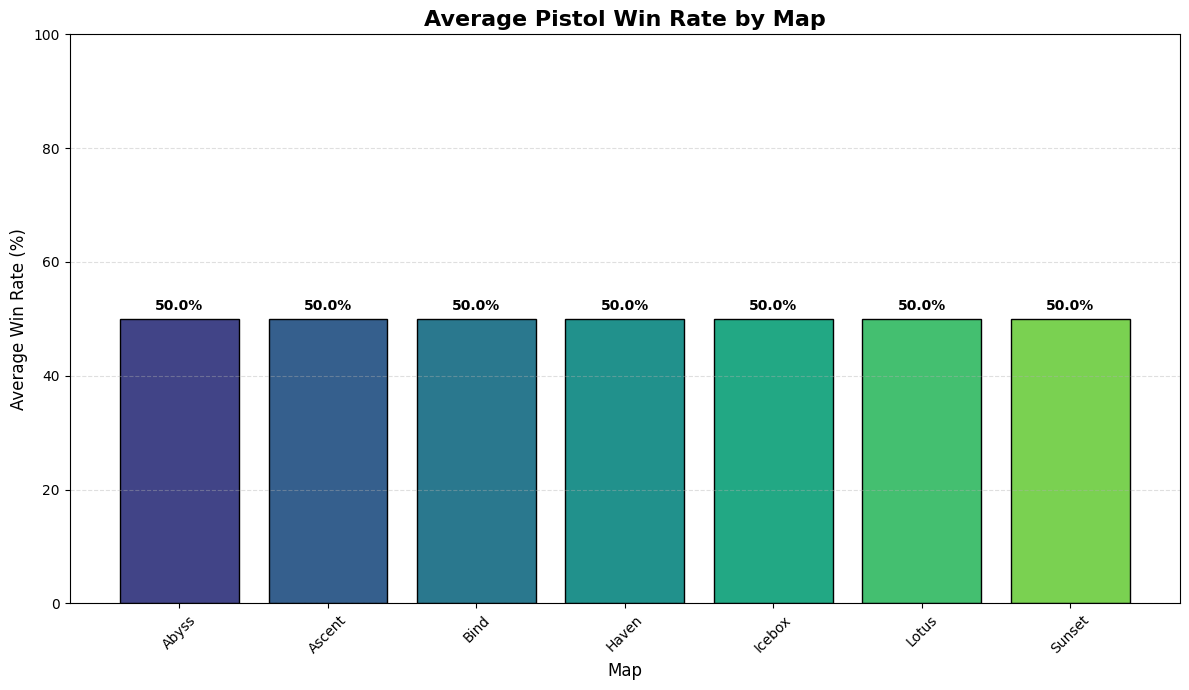

In [25]:
#average pistol winrate by map
# 1. Calculate the average Pistol winrate per map
map_pistol_stats = econ_df.groupby('map')['Pistol-winrate'].mean() * 100
map_pistol_stats = map_pistol_stats.sort_values(ascending=False)

# 2. Visualization with 'Viridis' Gradient
plt.figure(figsize=(12, 7))

# Create the viridis gradient
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(map_pistol_stats)))

bars = plt.bar(map_pistol_stats.index, map_pistol_stats.values, color=colors, edgecolor='black')

# Aesthetics
plt.title('Average Pistol Win Rate by Map', fontsize=16, fontweight='semibold')
plt.ylabel('Average Win Rate (%)', fontsize=12)
plt.xlabel('Map', fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adding value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontweight='semibold')

plt.tight_layout()
plt.show()

### Team Winrate Profile by Economy Type
- Compute mean winrates per team for pistol, eco, semi‑eco, semi‑buy, and full‑buy rounds  
- Normalize values row‑wise to show relative contribution (total = 100%)  
- Sort teams by full‑buy share  
- Plot stacked bar chart with percentage labels


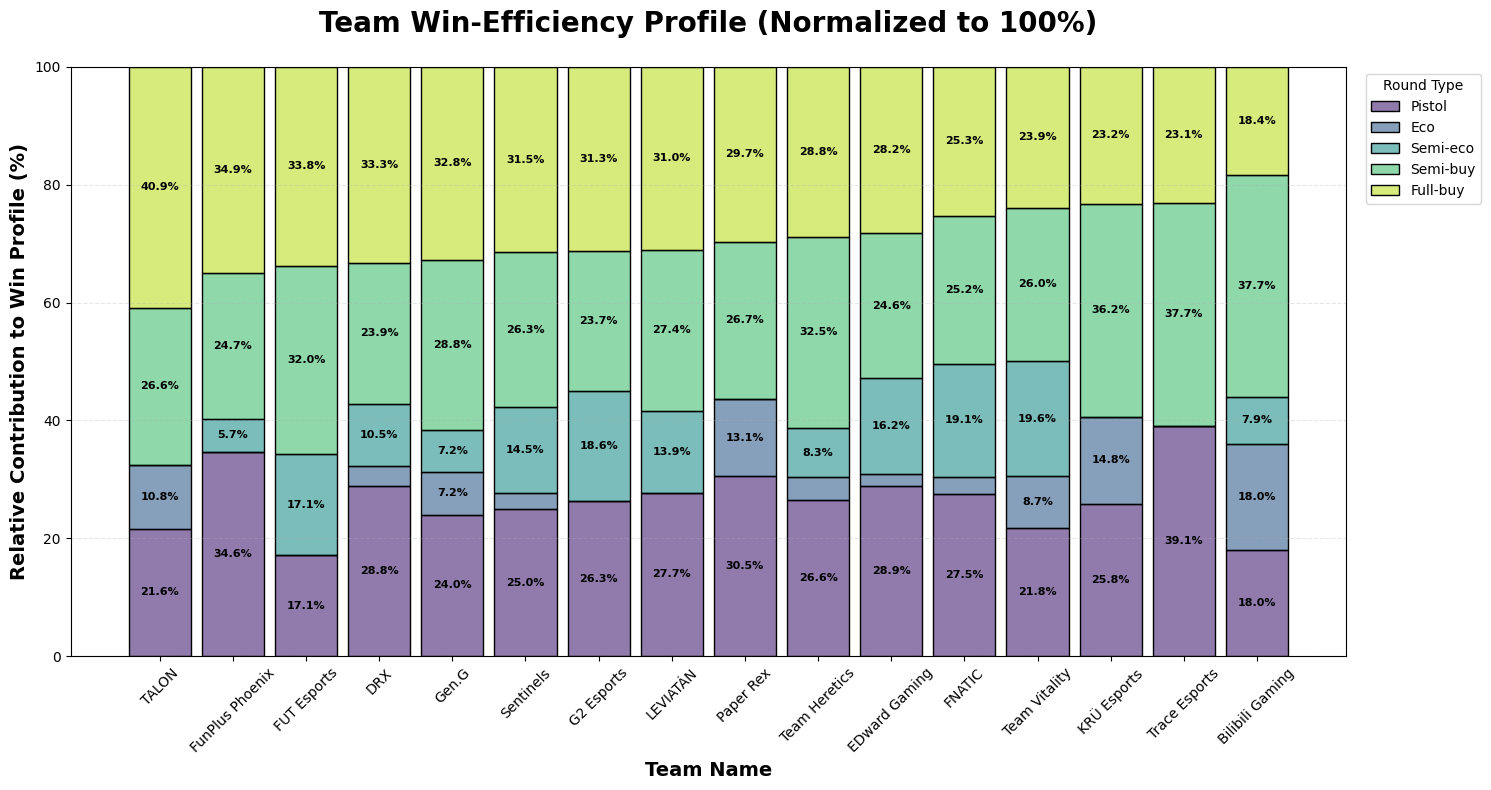

In [26]:
# plot pistol, eco, seci eco, semi buy and full buy win rate for each team
# Define the winrate columns
winrate_cols = [
    'Pistol-winrate',
    'Eco-winrate',
    'Semi-eco-winrate',
    'Semi-buy-winrate',
    'Full-buy-winrate'
]

# Calculate mean winrates per team
# We use .mean() which ignores NaNs (maps where a team didn't play that round type)
team_perf = econ_df.groupby('Team')[winrate_cols].mean() * 100

# Normalize the data so each bar totals 100%
# shows the RELATIVE STRENGTH of each economy type within that team's total performance
team_norm = team_perf.div(team_perf.sum(axis=1), axis=0) * 100

# Sort by Full-buy relative contribution
team_norm = team_norm.sort_values(by='Full-buy-winrate', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
teams = team_norm.index
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(winrate_cols)), alpha = 0.6)

bottom = np.zeros(len(team_norm))

for i, col in enumerate(winrate_cols):
    label_name = col.replace('-winrate', '')
    values = team_norm[col]
    
    bars = plt.bar(teams, values, bottom=bottom, color=colors[i], 
                   label=label_name, edgecolor='black', width=0.85)
    
    # Add labels inside the bars
    for bar in bars:
        height = bar.get_height()
        if height > 4: # Threshold to prevent text overlap in tiny segments
            plt.text(
                bar.get_x() + bar.get_width()/2, 
                bar.get_y() + height/2, 
                f'{height:.1f}%', 
                ha='center', va='center', 
                color='black', # Swap color for contrast on yellow/light green
                fontweight='semibold', 
                fontsize=8,
                rotation=0 # Rotate text because bars are thin with many teams
            )
    bottom += values

# Aesthetics
plt.title('Team Win-Efficiency Profile (Normalized to 100%)', fontsize=20, fontweight='semibold', pad=25)
plt.xlabel('Team Name', fontsize=14, fontweight='semibold')
plt.ylabel('Relative Contribution to Win Profile (%)', fontsize=14, fontweight='semibold')
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Round Type", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

### Full‑Buy vs. Thrifty Win Percentage
- Create new columns for thrifty rounds (eco + semi‑eco) won and played  
- Aggregate metrics per team and compute winrates for thrifty and full‑buy rounds  
- Filter teams with at least 3 thrifty rounds played, keep top 16 by full‑buy winrate  
- Plot grouped bar chart comparing full‑buy vs. thrifty win percentage

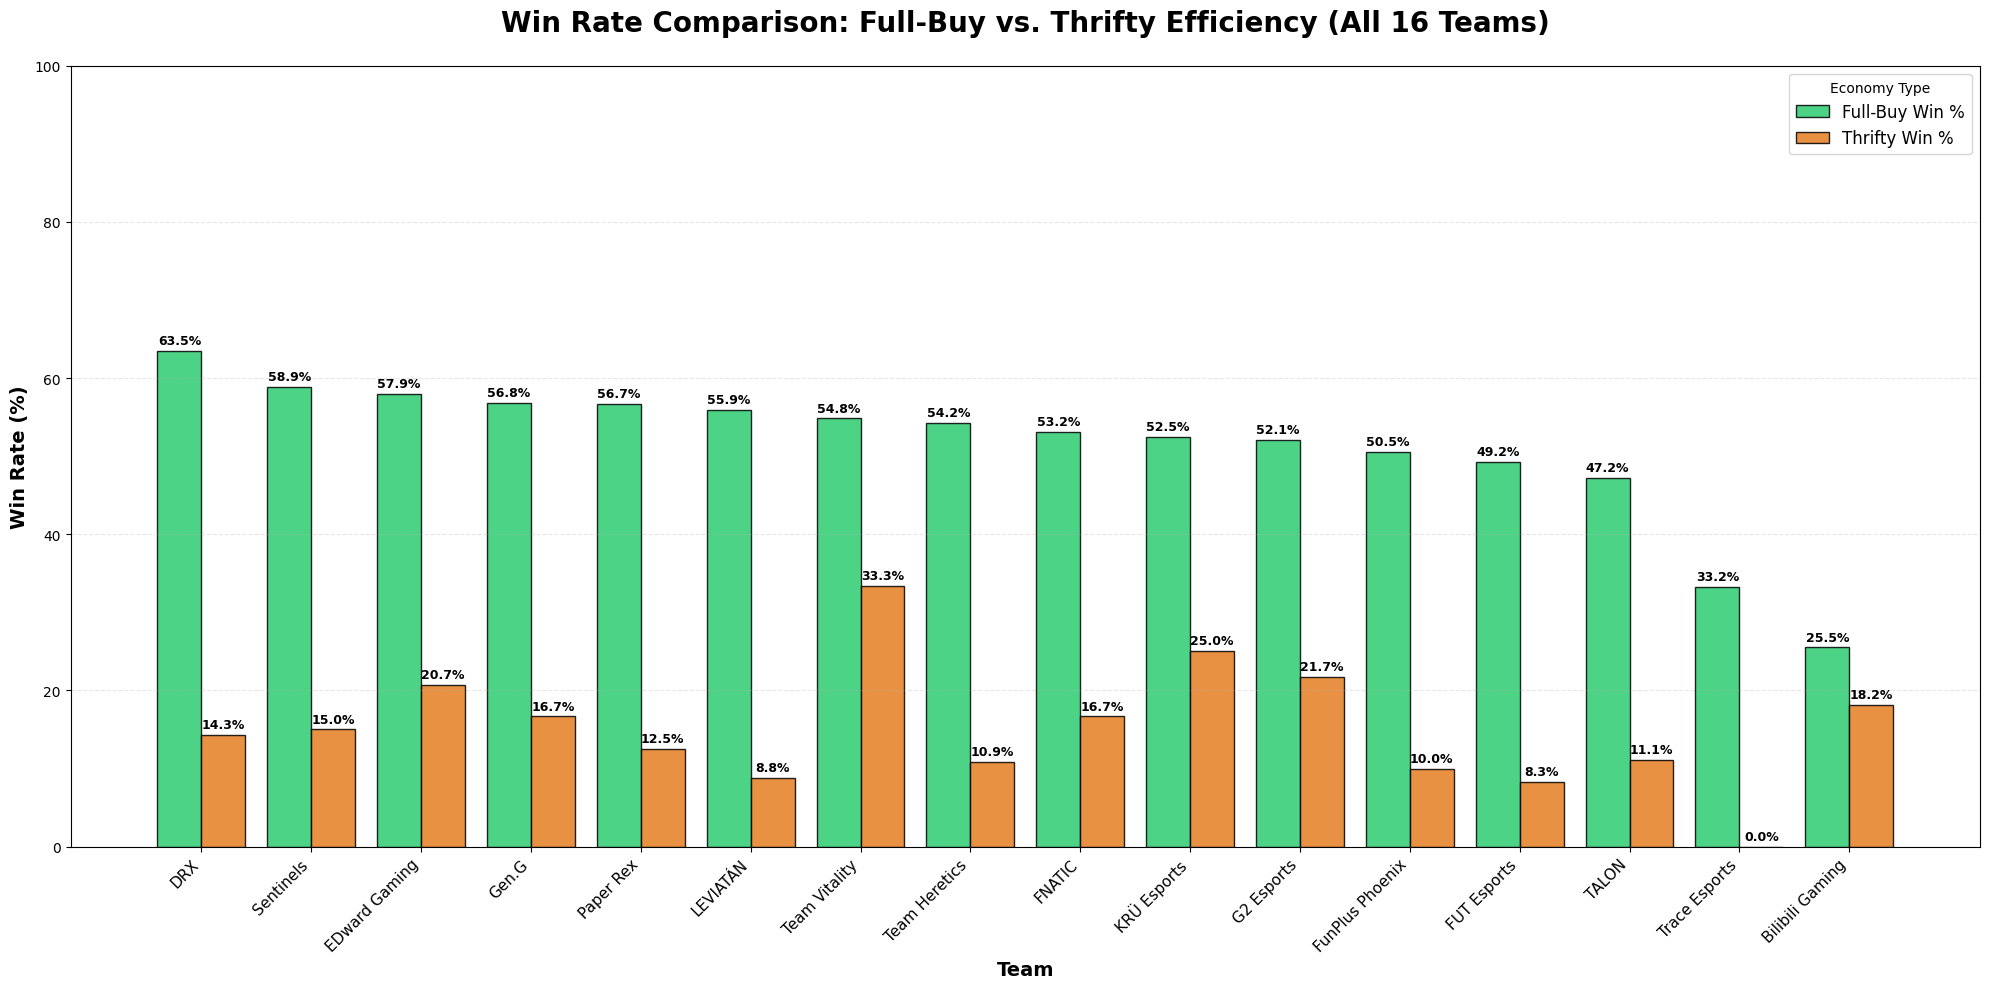

In [27]:
# Full buy vs thrifty win percentage 

df_full = econ_df.copy()

# Use .loc to create new columns for all rows
df_full.loc[:, 'thrifty_won'] = df_full['Eco-won'] + df_full['Semi-eco-won']
df_full.loc[:, 'thrifty_played'] = df_full['Eco'] + df_full['Semi-eco']

# Group by Team and aggregate metrics
team_comp = df_full.groupby('Team').agg({
    'thrifty_won': 'sum',
    'thrifty_played': 'sum',
    'Full-buy-winrate': 'mean'
})

# Calculate final percentages
team_comp['thrifty_winrate'] = (team_comp['thrifty_won'] / team_comp['thrifty_played']) * 100
team_comp['full_buy_winrate_pct'] = team_comp['Full-buy-winrate'] * 100

# Filter for significance and take exactly 16 teams 
# (Sorted by Full-Buy performance)
team_comp = team_comp[team_comp['thrifty_played'] >= 3].sort_values('full_buy_winrate_pct', ascending=False).head(16)

# Plotting
plt.figure(figsize=(20, 10)) # Wider figure for 16 teams
x = np.arange(len(team_comp.index))
width = 0.4

# Create bars
bar1 = plt.bar(x - width/2, team_comp['full_buy_winrate_pct'], width, 
               label='Full-Buy Win %', color='#2ecc71', edgecolor='black', alpha=0.85)
bar2 = plt.bar(x + width/2, team_comp['thrifty_winrate'], width, 
               label='Thrifty Win %', color='#e67e22', edgecolor='black', alpha=0.85)

# Aesthetics
plt.title('Win Rate Comparison: Full-Buy vs. Thrifty Efficiency (All 16 Teams)', 
          fontsize=20, fontweight='semibold', pad=25)
plt.ylabel('Win Rate (%)', fontsize=14, fontweight='semibold')
plt.xlabel('Team', fontsize=14, fontweight='semibold')
plt.xticks(x, team_comp.index, rotation=45, ha='right', fontsize=11)
plt.legend(title="Economy Type", fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, 100)

# Add Labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom', 
                 fontweight='semibold', fontsize=9, rotation=0)

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()